# RTEM Hackathon notebook

## Import standard libraries

In [1]:
import pandas as pd
import json
import numpy as np

## Import RTEM libraries

In [5]:
# Install onboard client to python, uncomment and run once
'''
!pip install onboard.client
'''

'\n!pip install onboard.client\n'

In [4]:
from onboard.client import RtemClient
from onboard.client.dataframes import points_df_from_streaming_timeseries
from onboard.client.models import PointSelector, TimeseriesQuery, PointData
from datetime import datetime, timezone, timedelta
from typing import List
import pytz

## Load secret

In [5]:
# Read secret from /secrets/ folder
with open('secrets/secrets.txt') as f:
    secret = f.readlines()[0]

# Setup client
client = RtemClient(api_key=secret)

In [ ]:
all_buildings = list(pd.DataFrame(client.get_all_buildings())['id'])
print(list(pd.DataFrame(client.get_all_buildings())['id'])) # returns list of buildings that you have access to (you may not have 'Laboratory' in your set)
print(len(all_buildings))

In [48]:
pd.json_normalize(client.get_all_buildings()).to_json("data/buildings.json")

In [39]:
query = PointSelector()
query.point_types     = ['Hot Water Supply Temperature']        # can list multiple point
query.equipment_types = ['boiler']     # types, equipment types,
query.buildings       = [98]           # buildings, etc.
selection = client.select_points(query)
points = selection["points"]

print(points)

sensor_metadata = pd.DataFrame(client.get_points_by_ids(points))

#start_date = sensor_metadata.last_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).min()
#end_date = sensor_metadata.first_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).max()

tz = pytz.timezone('UTC')
start_date = datetime(2018,1,20,0,0,0).replace(tzinfo=tz)
end_date = datetime(2018,2,20,0,0,0).replace(tzinfo=tz)

print(start_date, end_date)

timeseries_query = TimeseriesQuery(point_ids = selection['points'], start = end_date - timedelta(days=7), end = end_date)
sensor_data = points_df_from_streaming_timeseries(client.stream_point_timeseries(timeseries_query))
sensor_data.head()

[206336, 198657, 198658, 344578, 206339, 344581, 344585, 344588, 273934, 344592, 273939, 344595, 344599, 227351, 227353, 344602, 222746, 273948, 273949, 344606, 344609, 227362, 344613, 344616, 344620, 198655, 358999, 217178, 359004, 217180, 359009, 221316, 221320, 221833, 194188, 194193, 215185, 215187, 215188, 215697, 215701, 215705, 356024, 197306, 197308, 356029, 212163, 212167, 212168, 212170, 201418, 201421, 205019, 356061, 356066, 205027, 197864, 197865, 224514, 204548, 224517, 356102, 224516, 204552, 310025, 224524, 224525, 224526, 205068, 197392, 205073, 310044, 356126, 197407, 356131, 205612, 310061, 205619, 201534, 203584, 203586, 210757, 209222, 210759, 343366, 201033, 201035, 343371, 310096, 209234, 209246, 201567, 344414, 201569, 199523, 344419, 228709, 209258, 220527, 220529, 310134, 284534, 326009, 199546, 326013, 201603, 344452, 201605, 228743, 200584, 344457, 200586, 228755, 414611, 414615, 203687, 203689, 199085, 199087, 198594, 306129, 198099, 198104, 199150, 199154,

,timestamp,209258
0,2018-02-13T00:15:00Z,161.4
1,2018-02-13T00:30:00Z,161.5
2,2018-02-13T00:45:00Z,161.5
3,2018-02-13T01:00:00Z,161.4
4,2018-02-13T01:15:00Z,161.9


<AxesSubplot:title={'center':'Hot Water Supply Temperature'}, ylabel='Temperature [F]'>

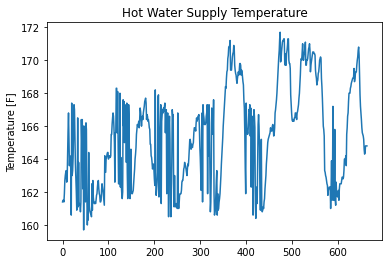

In [43]:
sensor_data[209258].plot(title="Hot Water Supply Temperature", ylabel="Temperature [F]")

In [14]:
sensor_metadata.head()

,id,building_id,last_updated,first_updated,device,network_device,objectId,name,description,units,tagged_units,raw_unit_id,value,type,point_type_id,measurement_id,datasource_hash,topic,state_text,equip_id
0,199416,162,1.535774e+12,1.517461e+12,,None,,,HV-1 Auditorium_Space Temp,F,None,2,76.9,Zone Temperature,77,1,f2c4e443248ea4b005a09bc1eb5519bb,nyserda+0000082141+ahu1-hv+HV-1 Auditorium_Spa...,None,18310
1,199641,162,1.535127e+12,1.520019e+12,,None,,,Room 186 CUH-22_Space Temp,F,None,2,82.4,Zone Temperature,77,1,e3e5d7e0d12f35007bf67c7ecc209e36,nyserda+0000082141+cuh22-room186+Room 186 CUH-...,None,18329
2,199646,162,1.535127e+12,1.520019e+12,,None,,,Room 184 CUH-23_Space Temp,F,None,2,32,Zone Temperature,77,1,0982edc59ea6a93c2a5bbdc374d682fc,nyserda+0000082141+cuh23-room184+Room 184 CUH-...,None,18330
3,199707,162,1.535774e+12,1.520019e+12,,None,,,Bathroom 116_Space Temp,F,None,2,76.9,Zone Temperature,77,1,ee0c9a22509a975291cbe88431724a52,nyserda+0000082141+fcu-bathroom116+Bathroom 11...,None,18351
4,199712,162,1.535774e+12,1.520019e+12,,None,,,Bathroom 117_Space Temp,F,None,2,76.7,Zone Temperature,77,1,4ec13cb622d4ca8546bb481edadb765a,nyserda+0000082141+fcu-bathroom117+Bathroom 11...,None,18352


In [24]:
pd.json_normalize(client.get_equipment_types()).to_csv("data/equip_types.csv")
pd.json_normalize(client.get_all_point_types()).to_csv("data/point_types.csv")

In [ ]:
# cooling demand/area for each building